In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylops

from scipy import linalg as la
from scipy import sparse

from trips.io import build_x_true
from trips.operators import gaussian_blur_operator, first_derivative_operator
from trips.solvers.gks_all import MMGKS

ImportError: cannot import name 'generalized_golub_kahan' from 'trips.decompositions' (/Users/mirjetapasha/Documents/Research_Projects/TRIPS_June25/multiparameter_package/trips/decompositions.py)

### construct a true image

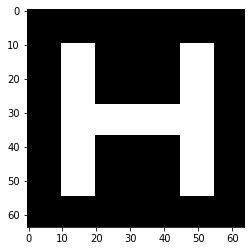

In [2]:
x_true = build_x_true().reshape(-1,1)

plt.imshow(x_true.reshape(64,64), cmap='Greys_r')

### apply an operator

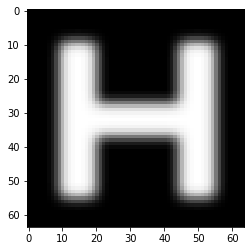

In [4]:
blur_operator = gaussian_blur_operator([9,9],2,64,64)

b_true = blur_operator @ x_true

plt.imshow( b_true.reshape(64,64), cmap='Greys_r')

### contaminate with noise

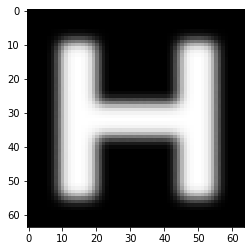

In [5]:
noise_level = 0.001
noise = np.random.randn(64*64)
e = noise_level * np.linalg.norm(b_true) / np.linalg.norm(noise) * noise
e = e.reshape(-1,1)
b = b_true + e
plt.imshow( b.reshape(64,64), cmap='Greys_r')

### construct regularization operators

In [6]:
I = pylops.Identity(4096) # identity operator
D = first_derivative_operator(n=4096) # first derivative operator
D2 = D @ D # second derivative operator

### run MMGKS with GCV

In [14]:
(x, x_history, lambdah, lambda_history, res_history, rre_history) = MMGKS(blur_operator, b, D, pnorm=2, qnorm=1, regparam='gcv', projection_dim=3, iter=80, x_true=x_true, tol=10**(-16))

ValueError: Improper number of dimensions to norm.

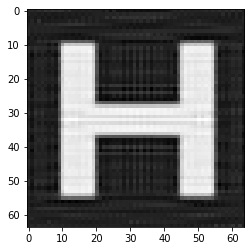

In [7]:
plt.imshow(x.reshape(64,64), cmap='Greys_r')

### Convergence

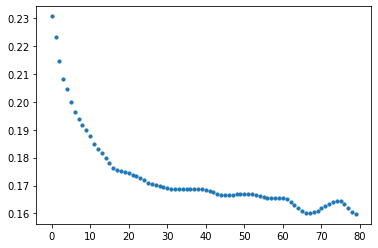

In [8]:
plt.scatter(range(len(rre_history)), rre_history, s=10)

### history of solutions

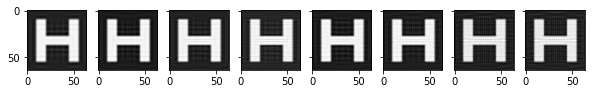

In [9]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(x_history[9+10*ii].reshape(64,64), cmap='Greys_r')

plt.show()

### history of lambda values

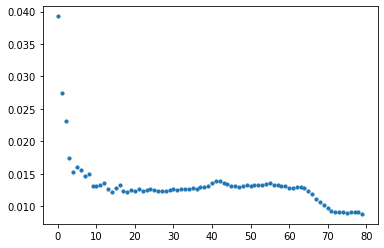

In [10]:
plt.scatter(range(len(lambda_history)), lambda_history, s=10)

### run MMGKS with DP

In [10]:
(x, x_history, lambdah, lambda_history, res_history, rre_history) = MMGKS(blur_operator, b, D, pnorm=2, qnorm=1, projection_dim=3, iter=80, regparam='dp', x_true=x_true, eta=1.01, delta=la.norm(e), tol=10**(-16))

running MMGKS...: 100%|██████████| 5/5 [00:00<00:00, 66.69it/s]


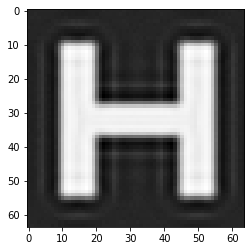

In [11]:
plt.imshow(x.reshape(64,64), cmap='Greys_r')

### convergence

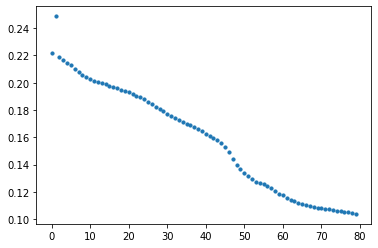

In [13]:
plt.scatter(range(len(rre_history)), rre_history, s=10)

### history of solutions

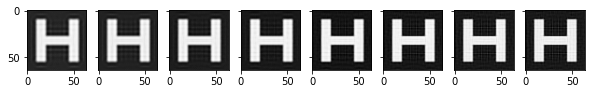

In [14]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(x_history[9+10*ii].reshape(64,64), cmap='Greys_r')

plt.show()

### history of lambda values

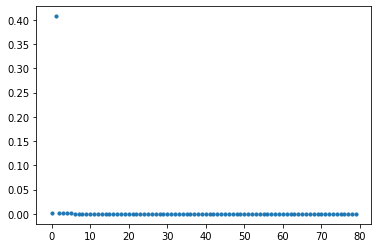

In [15]:
plt.scatter(range(len(lambda_history)), lambda_history, s=10)

### run MMGKS with a sequence of parameter values

In [16]:
regvals = [0.001*(0.5**(x)) for x in range(0,80)]

In [17]:
(x, x_history, lambdah, lambda_history, res_history, rre_history) = MMGKS(blur_operator, b, D, pnorm=2, qnorm=1, projection_dim=3, iter=80, regparam=regvals, x_true=x_true, tol=10**(-16))

running MMGKS...: 100%|██████████| 80/80 [00:03<00:00, 22.57it/s] 


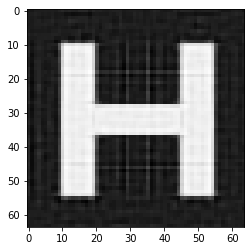

In [18]:
plt.imshow(x.reshape(64,64), cmap='Greys_r')

### convergence

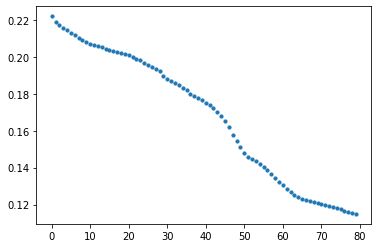

In [19]:
plt.scatter(range(len(rre_history)), rre_history, s=10)

### history of solutions

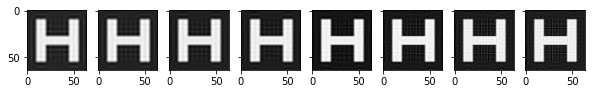

In [20]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(x_history[9+10*ii].reshape(64,64), cmap='Greys_r')

plt.show()

### history of lambda values

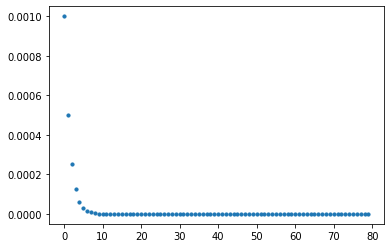

In [21]:
plt.scatter(range(len(lambda_history)), lambda_history, s=10)